In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# libraries to import and clean texts
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     F:\ProgramData\Anaconda3\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     F:\ProgramData\Anaconda3\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     F:\ProgramData\Anaconda3\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Importing the dataset
# by putiing quoting 3 we are ignoring the quotes in the docs
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


Now we visulaize the words that contribute to negative and positive review. 
To achieve that we will divide the words into negative and positive words

In [4]:
#splitting the dataset to positive and negative
positiveReviews = dataset[dataset.Liked == 1]
negativeReviews = dataset[dataset.Liked == 0]

We will focus on generating the word cloud for positive words

In [5]:
positiveReviews.Review.head()

0                             Wow... Loved this place.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
8                            The fries were great too.
9                                       A great touch.
Name: Review, dtype: object

Now we need to remove stopwords such as "the, these," etc so that no weightage is given for these words while building the model. 

In [6]:
#lets see the stopwords in nltk
w=stopwords.words('english')
print (w)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Most of these words are not needed but negative words such as mightn'nt , needn't etc is much needed in our case.

In [7]:
neededWords = ['mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",'don', "don't", 'should', "should've", 'no', 'nor', 'not'] 

So now we will assign the nltk stopwords to a variable let say buitinstopwords and delete the needed words from the same

In [8]:
builtinstopwords = stopwords.words('english')


In [9]:
for word in neededWords:
    if word in builtinstopwords: 
        builtinstopwords.remove(word)
print (builtinstopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', '

In [10]:
builtinstopwords.extend(["food", "place"])
print (builtinstopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', '

In [11]:
#assigning the positive words to a single variable after cleaning
positive_words = ''
for sentence in positiveReviews.Review:
    temptext = re.sub('[^a-zA-Z]', ' ', sentence) #deleting all unwanted words
    temptext = temptext.lower() #converting the texts to lowercase
    tokens = nltk.word_tokenize(temptext) #tokenizing
    tokens = [word for word in tokens if word not in set(builtinstopwords)]
    
    for words in tokens:
        positive_words = positive_words + words + ' '
    #if you want to use lemming or stemmin you could use the following lines
    #review = [ps.stem(word) for word in review if not word in set(builtinstopwords)]
    #review = [lm.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    #making it in a string from a set  with space
    #review = ' '.join(review
#positive_words

In [12]:
#function to generate wordcloud
def generate_wordcloud(text): # optionally add: stopwords=STOPWORDS and change the arg below
    wordcloud2 = WordCloud(
                          width=600, height=400,
                          stopwords = {'to', 'of'} # set or space-separated string
                          ).generate(text)
    plt.figure( figsize=(10,8), facecolor='k')
    plt.imshow(wordcloud2)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


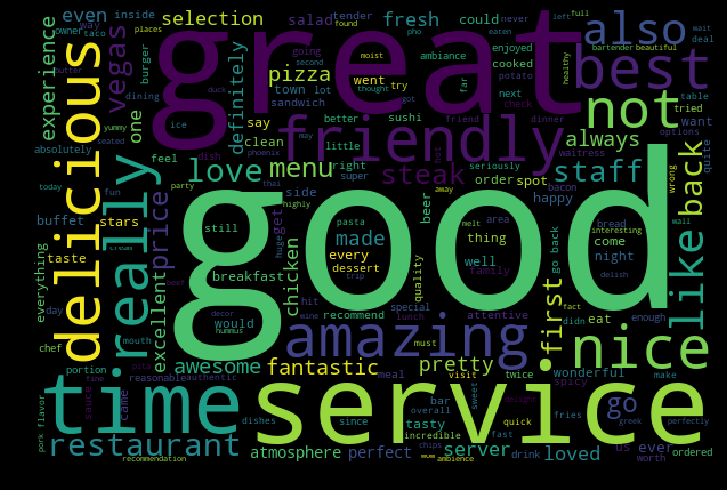

In [13]:
generate_wordcloud(positive_words)

We shall repeat the same for negative words

In [14]:
negative_words = ''
for sentence in negativeReviews.Review:
    temptext = re.sub('[^a-zA-Z]', ' ', sentence)
    temptext = temptext.lower()
    tokens = nltk.word_tokenize(temptext)
    tokens = [word for word in tokens if word not in set(builtinstopwords)]
    
    for words in tokens:
        negative_words = negative_words + words + ' '
    #review = [ps.stem(word) for word in review if not word in set(builtinstopwords)]
    #review = [lm.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    #making it in a string from a set  with space
    #review = ' '.join(review
#negative_words

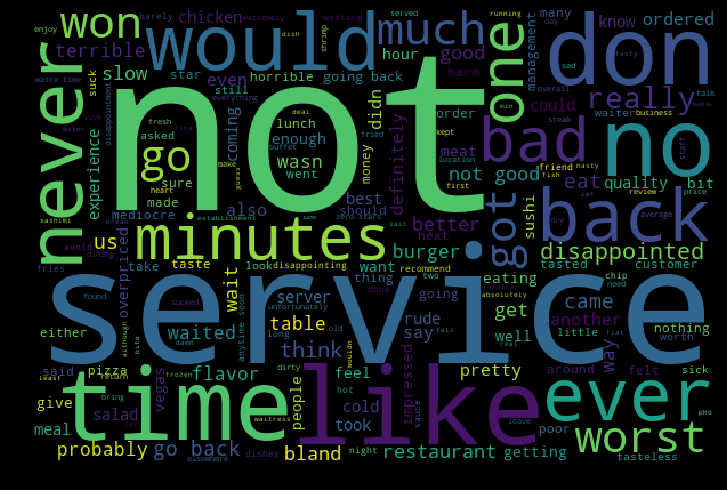

In [15]:
generate_wordcloud(negative_words)

These 2 word cloud looks fine. If you feel some words should be there you can put in the stopwords.

Now the same cleaning technique we can apply for the whole dataset

In [16]:
corpus = []
for i in range(0, len(dataset)):
    #sub removes punctuations numbers extraa
    #only include all the alphabets uppercas and lower case and 
    #also a space ' ' for each row in review column
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    #applying lowercase 
    review = review.lower()
    #SPLIT THE words into a list of words
    review = review.split()
    ps = PorterStemmer()
    #lm = WordNetLemmatizer()
    #use set() for faster optimization it is faster than a list
    #we take out words like "this that" etc which are found in stopwords from the review corpus
    #stemming This will remove the suffixes/prefixs like ing from the words and gives another word. 
    #review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = [ps.stem(word) for word in review if not word in set(builtinstopwords)]
    #review = [lm.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    #making it in a string from a set  with space
    review = ' '.join(review)
    corpus.append(review)


#for i in range(0,len(corpus)):
#    print (i,corpus[i])
    

In [17]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
#max features returns the n number of most common words
#so reduced to total words from 1766 to 1500
cv = CountVectorizer() #max_features = 1500
#generate a sparse matrix (bow)
X_cv = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values
X_cv.shape


(1000, 1581)

In [19]:
#convertint he X to a dataframe
X = pd.DataFrame(X_cv,columns=cv.get_feature_names())
X.head()

,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,acknowledg,across,...,year,yellow,yellowtail,yelper,yet,yucki,yukon,yum,yummi,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

Now lets import Ml algorithms

In [23]:
from sklearn.linear_model import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier

We will make a list of models that we will use

In [24]:
models = []
models.append(('Logistic Regression with l1 penalty', LogisticRegression(penalty='l1',random_state= 7)))
models.append(('Logistic Regression with l2 penalty', LogisticRegression(penalty='l2',random_state= 7,dual=False)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=10)))
models.append(('Random Forest with Entropy', RandomForestClassifier(n_estimators=500, criterion= "entropy", random_state= 7)))
models.append(('Random Forest with gini', RandomForestClassifier(n_estimators=500, criterion= "gini", random_state= 7)))
models.append(('DecisionTree with entropy', DecisionTreeClassifier(criterion= "entropy", random_state= 7)))
models.append(('DecisionTree with gini', DecisionTreeClassifier(criterion= "gini", random_state= 7)))
models.append(('Gaussian Naive Bayes', GaussianNB()))
models.append(('Multinominal Naive Bayes', MultinomialNB()))
models.append(('Bernoulli Naive Bayes', BernoulliNB()))

In [28]:
from sklearn.metrics import * 

In [29]:
def adjustedR(Ytest,ypredict,n,p):
    """ Function to calcualte adjusted R"""
    r2 = r2_score(Ytest,ypredict)
    adjustedr2 = 1-((1-r2)*((n-1)/(n-p-1)))
    #where n is number of observations in sample and p is number of independent variables in model
    return (adjustedr2)

In [30]:
def ROCcurve(fpr, tpr,name):
    """ Function to generate ROC Curve"""
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic\n%s'%name)
    plt.legend(loc="lower right")
    #plt.savefig('somename.png'%name, format='png')
    return (plt.show())

In [31]:
#function to run the models for the datasets
def allmodels(X_train, Y_train,X_test,Y_test,X):
    """
    this generates roc cure for each model and a dataframe of measurements of all the models
    
    """
    model_list = pd.DataFrame(columns=("Model","Accuracy","F1Score","AUC","Diff of Adj R and R"))
    rownumber = 0
    for name, model in models:
        classifier = model
        classifier.fit(X_train, Y_train)
        # prediction
        Y_predict = classifier.predict(X_test)
        fpr, tpr, thresholds = roc_curve(Y_test, Y_predict, pos_label=1)
        #print (name)
        ROCcurve(fpr, tpr,name)
        r2 = abs(r2_score(Y_test,Y_predict))
        adjustedr = abs(adjustedR(Y_test,Y_predict,len(X),len(X.columns)))
        model_list.loc[rownumber,"Model"]= name
        model_list.loc[rownumber,"Accuracy"] = round(((accuracy_score(Y_test,Y_predict))*100))
        model_list.loc[rownumber,"F1Score"]= round((f1_score(Y_test,Y_predict)),2)
        model_list.loc[rownumber,"AUC"]= round((roc_auc_score(Y_test,Y_predict)),2)
        model_list.loc[rownumber,"Diff of Adj R and R"] = round ((adjustedr-r2),3)
        #print (confusion_matrix(Y_test,Y_predict))
        rownumber += 1
    model_list.sort_values(by="AUC",ascending=False)
    return (model_list.sort_values(by="AUC",ascending=False))


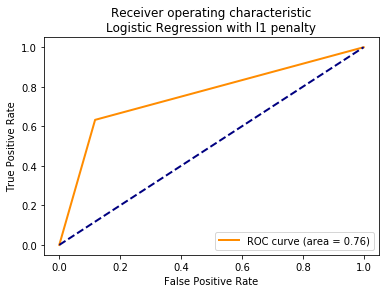

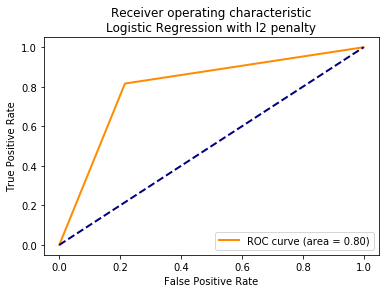

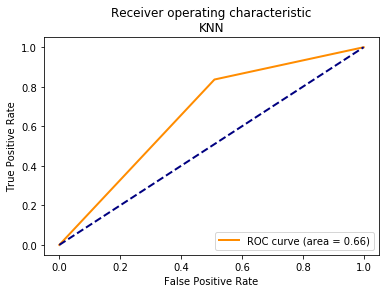

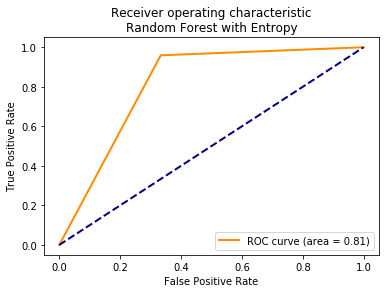

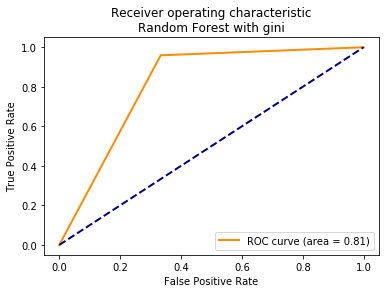

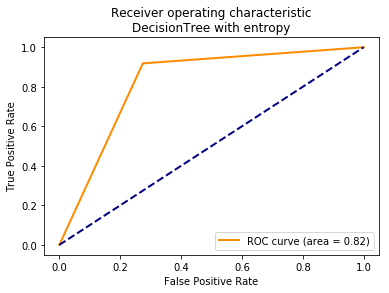

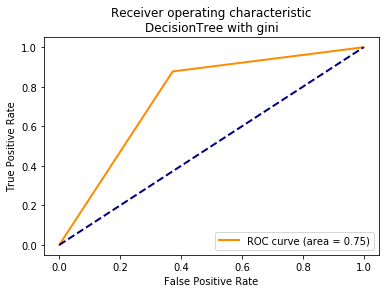

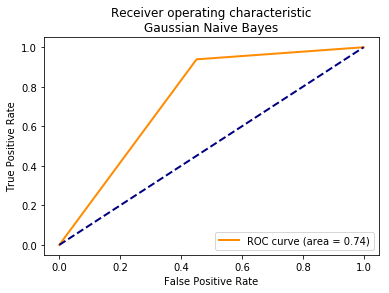

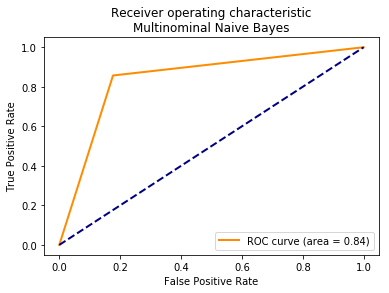

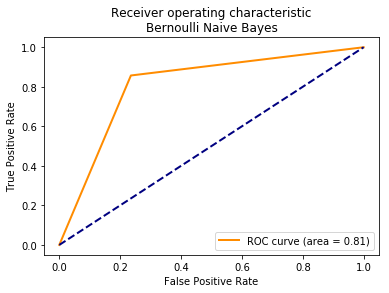

,Model,Accuracy,F1Score,AUC,Diff of Adj R and R
8,Multinominal Naive Bayes,84,0.84,0.84,1.739
5,DecisionTree with entropy,82,0.83,0.82,1.957
3,Random Forest with Entropy,81,0.83,0.81,2.065
4,Random Forest with gini,81,0.83,0.81,2.065
9,Bernoulli Naive Bayes,81,0.82,0.81,2.065
1,Logistic Regression with l2 penalty,80,0.8,0.8,2.174
0,Logistic Regression with l1 penalty,76,0.72,0.76,2.609
6,DecisionTree with gini,75,0.77,0.75,2.717
7,Gaussian Naive Bayes,74,0.78,0.74,2.745
2,KNN,66,0.71,0.66,2.975


In [32]:
allmodels(X_train, y_train, X_test, y_test,X)

From the output we can conclude that we could go for Multinominal Naive Bayes as it gives the highest accuracy and AUC